<a href="https://colab.research.google.com/github/kahiga2244/Week-9-project/blob/master/Moringa_Core_WK9_Joseph_Kahiga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Defining the Question

a) Specifying the Data Analytic Question

Implement a K-nearest neighbor (kNN) classifier on the dataset provided

b) Defining the Metric for Success

Randomly partition each dataset into two parts i.e 80 - 20  sets.
For dataset 1, because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.

c) Understanding the context

d) Recording the Experimental Design

e) Data Relevance

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2. Loading The Dataset

In [ ]:
train = pd.read_csv('/content/train (5).csv')
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
test = pd.read_csv('/content/test (1).csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
len(train),len(test)

(891, 418)

In [ ]:
#making them not equal
train.shape,test.shape

((891, 12), (418, 11))

3. checking the dataset

In [ ]:
test.count().head()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
dtype: int64

In [ ]:
train.count().tail()

Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

In [ ]:
#the datasets
train.duplicated().sum()
test.duplicated().sum()

0

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


4. External Data Source Validation

5. Tyding The datasets

replacing the null values with mean for age columns

In [ ]:
train['Age'].fillna((test['Age'].mean()), inplace=True)

In [ ]:
test['Age'].fillna((test['Age'].mean()), inplace=True)

replacing null values in the entire dataset

In [ ]:
train = train.drop(train.columns[train.isna().sum()>len(train.columns)],axis = 1)
train = train.dropna(axis = 0).reset_index(drop=True)

In [ ]:
test = test.drop(test.columns[train.isnull().sum()>len(test.columns)],axis = 1)
test = test.dropna(axis=0).reset_index(drop=True)

In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
train.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64

In [112]:
train = train.drop(columns=['PassengerId'])
train

KeyError: ignored

6. Exploratory Analysis

Univariate analysis

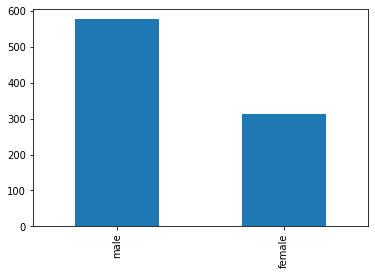

In [113]:
train['Sex'].value_counts().head(10).plot.bar()

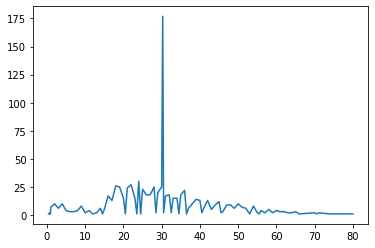

In [106]:
train['Age'].value_counts().sort_index().plot.line()

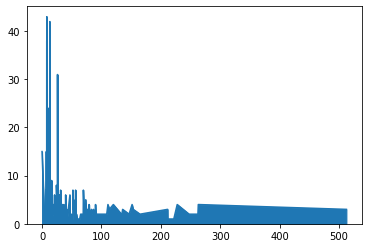

In [107]:
train['Fare'].value_counts().sort_index().plot.area()

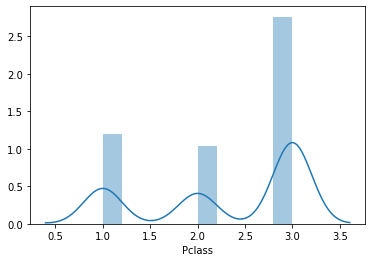

In [123]:
sns.distplot(train['Pclass'])

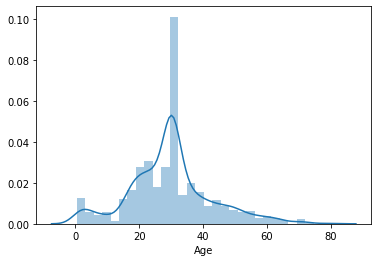

In [125]:
sns.distplot(train['Age'])

The majority of people were in 3Pclass

Bivariate analysis

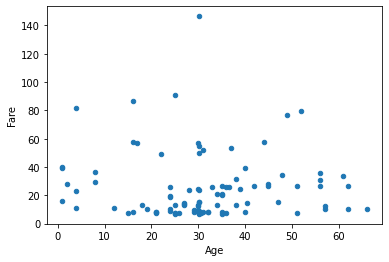

In [114]:
train[train['Pclass'] < 100].sample(100).plot.scatter(x='Age', y='Fare')

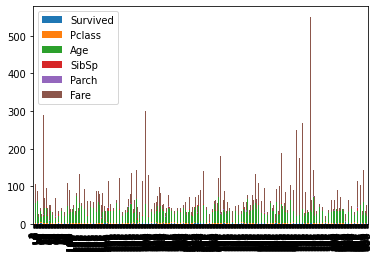

In [115]:
train.plot.bar(stacked=True)

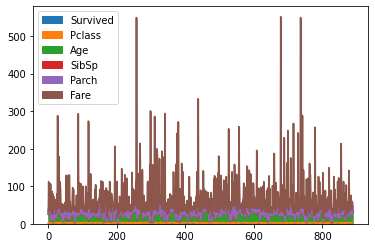

In [116]:
train.plot.area()

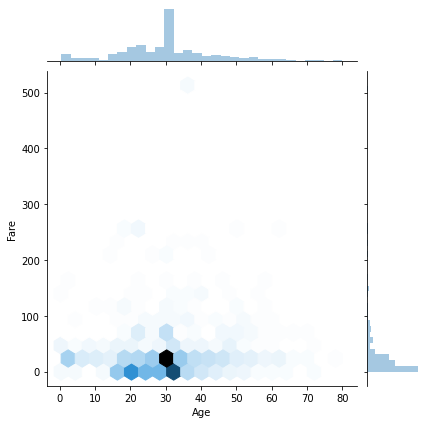

In [121]:
sns.jointplot(x='Age', y='Fare', data=train[train['Age'] < 100], kind='hex', 
              gridsize=20)

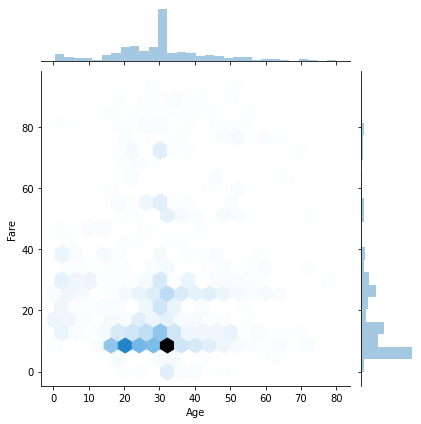

In [122]:
sns.jointplot(x='Age', y='Fare', data=train[train['Fare'] < 100], kind='hex', 
              gridsize=20)

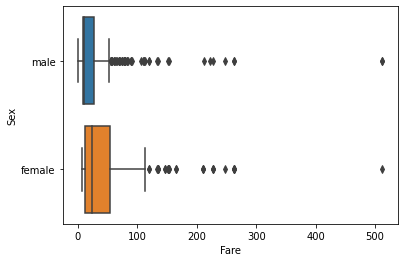

In [128]:
sns.boxplot(x='Fare', y='Sex', data=train)

Females were more compared to male

The age group concentrated more around 30years

7. Implementing the Solution

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(train['Sex'])
LabelEncoder()

LabelEncoder()

In [ ]:
## Splitting our dataset into its attributes and labels
## For dataset 1, because we don't have the label for the test set, we will use the train set to create train and test data
X = train[['Pclass','Age','SibSp','Parch','Fare']]
y = train['Sex']


In [ ]:
###training
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train,y_test)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [129]:
# Training and Predictions
#knn=2
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [130]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [131]:
# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[51 18]
 [51 58]]
              precision    recall  f1-score   support

      female       0.50      0.74      0.60        69
        male       0.76      0.53      0.63       109

    accuracy                           0.61       178
   macro avg       0.63      0.64      0.61       178
weighted avg       0.66      0.61      0.62       178



knn=5

In [144]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))


0.7480314960629921


knn=10

In [134]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.7221597300337458


#changing the sample size

In [135]:
###training
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.53)

In [136]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train,y_test)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [137]:
# Training and Predictions
#knn=2
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [138]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [139]:
# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[102  53]
 [142 175]]
              precision    recall  f1-score   support

      female       0.42      0.66      0.51       155
        male       0.77      0.55      0.64       317

    accuracy                           0.59       472
   macro avg       0.59      0.61      0.58       472
weighted avg       0.65      0.59      0.60       472



knn=5

In [140]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.7480314960629921


knn=7

In [141]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.7311586051743532


8. Challenging the solution

knn=13

In [142]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.7019122609673791


when we increase the KNN  we reduce the accuracy 

9. Follow up questions

At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.




a). Did we have the right data?

b). Do we need other data to answer our question?

c). Did we have the right question?